# http://learningtensorflow.com/lesson3/

In [7]:
%matplotlib notebook
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [31]:
# First, load the image
filename = "MarshOrchid.jpg"
image = mpimg.imread(filename)

# Print out its shape
print(image.shape)

(5528, 3685, 3)


In [35]:
image[0]

array([[147, 137,  88],
       [148, 138,  89],
       [148, 138,  89],
       ..., 
       [143, 160, 116],
       [143, 160, 115],
       [143, 160, 115]], dtype=uint8)

<IPython.core.display.Javascript object>


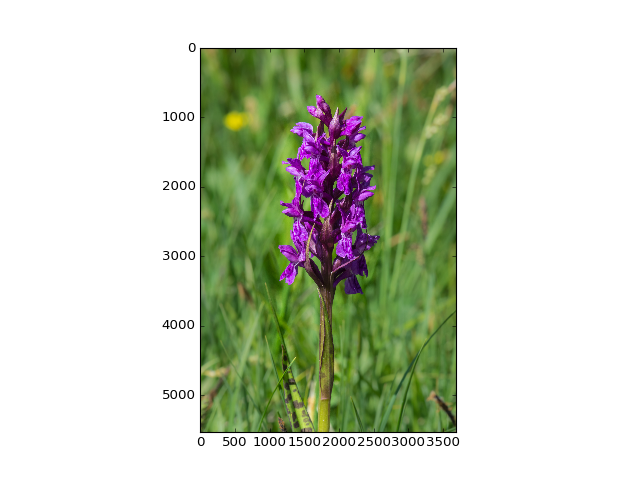

In [16]:
plt.imshow(image)
plt.show()


### The first transformation we will perform is a transpose, turning the image 90 degrees counter-clockwise. The full program is below, most of which you have seen.

<IPython.core.display.Javascript object>


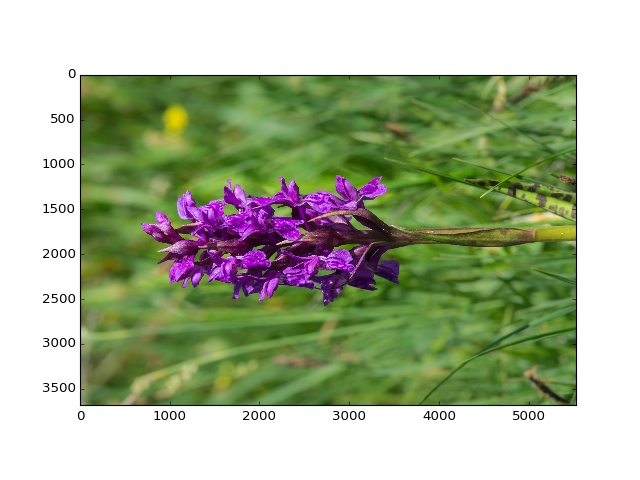

In [37]:
# First, load the image again
filename = "MarshOrchid.jpg"
image = mpimg.imread(filename)

# Create a TensorFlow Variable
x = tf.Variable(image, name='x')

model = tf.initialize_all_variables()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1, 0, 2]) # tanspose but not really rotation  
    session.run(model)
    result = session.run(x)


plt.imshow(result)
plt.show()

For this function, it can be best thought of as:

Iterate through the array according to batch_dim. Setting batch_dim=0 means we go through the rows (top to bottom).
For each item in the iteration
Slice a second dimension, denoted by seq_dim. Setting seq_dim=1 means we go through the columns (left to right).
The slice for the nth item in the iteration is denoted by the nth item in seq_lengths

In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "MarshOrchid.jpg"
image = mpimg.imread(filename)
height, width, depth = image.shape



(5528, 3685, 3)


<IPython.core.display.Javascript object>


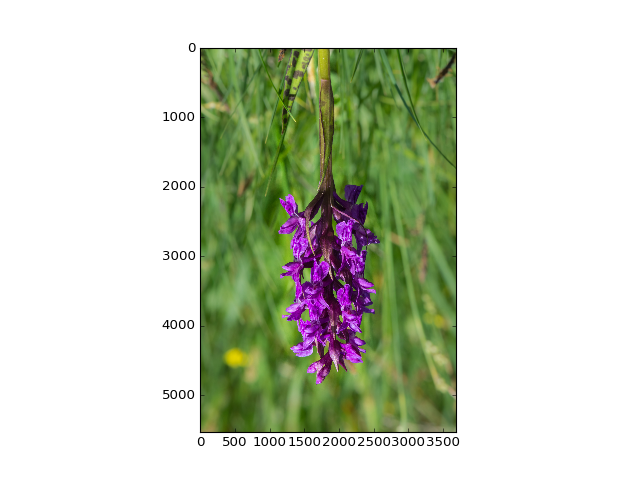

In [66]:
# Create a TensorFlow Variable
x = tf.Variable(image, name='x')

model = tf.initialize_all_variables()

with tf.Session() as session:
    # x = tf.reverse_sequence(x, np.ones((height,)) * width, 1, batch_dim=0)
    x = tf.reverse_sequence(x, width * [height], 0, batch_dim=1) ## up-side-down
    session.run(model)
    result = session.run(x)

print(result.shape)
plt.imshow(result)
plt.show()

(5528, 3685, 3)


<IPython.core.display.Javascript object>


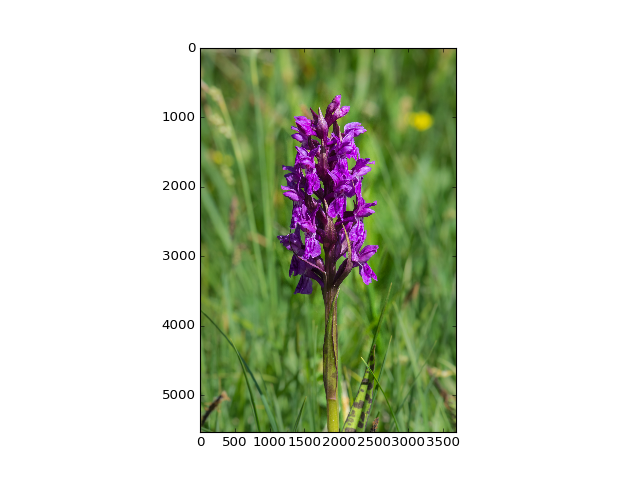

In [64]:
# Create a TensorFlow Variable
x = tf.Variable(image, name='x')

model = tf.initialize_all_variables()

with tf.Session() as session:
    x = tf.reverse_sequence(x, np.ones((height,)) * width, 1, batch_dim=0)
    #x = tf.reverse_sequence(x, width * [height], 0, batch_dim=1) ## up-side-down
    session.run(model)
    result = session.run(x)

print(result.shape)
plt.imshow(result)
plt.show()

# Exercises

1) Combine the transposing code with the flip code to rotate clock wise.

2) Currently, the flip code (using reverse_sequence) requires width to be precomputed. Look at the documentation for the tf.size function, and use it to compute the width of the x variable within the session.

3) Perform a “flipud”, which flips the image top-to-bottom.

4) Compute a “mirror”, where the first half of the image is copied, flipped (l-r) and then copied into the second half.

